In [184]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state

from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [78]:
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# 下载MNIST数据集
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.astype('float')
Y = Y.astype('int')

In [3]:
# MNIST数据集，构造包含2000个样本的子集，每个类别包含200个样本
n_classes = np.unique(Y)
X_use, Y_use = np.array([]), np.array([])

for i in range(n_classes.shape[0]):
    pos = np.where(Y==n_classes[i])
    X_label = X[pos]
    Y_label = Y[pos]
    assert np.all(Y_label == n_classes[i])
    
    random_state = check_random_state(0)
    permutation = random_state.permutation(X_label.shape[0])
    X_label = X_label[permutation]
    Y_label = Y_label[permutation]
    
    if X_use.size <= 0:
        X_use = X_label[:200]
    else:    
        X_use = np.concatenate((X_use, X_label[:200]), axis=0)
    
    if Y_use.size <= 0:
        Y_use = Y_label[:200]
    else:
        Y_use = np.concatenate((Y_use, Y_label[:200]), axis=0)

In [119]:
# 构造训练集和测试集
random_state = check_random_state(0)
permutation = random_state.permutation(X_use.shape[0])
X_use = X_use[permutation]
Y_use = Y_use[permutation]

X_train, X_test, y_train, y_test = train_test_split(X_use, Y_use, test_size=0.33, random_state=42)

In [124]:
# 每个类标注20%
percentage = 0.2
n_classes = np.unique(y_train)

for i in range(n_classes.shape[0]):
    pos = np.where(y_train==n_classes[i])
    unlabel_length = int(pos[0].shape[0] * (1-percentage))
    y_train[pos[0][:unlabel_length]] = -1

In [175]:
# # 每个类标注30%
# percentage = 0.3
# n_classes = np.unique(y_train)

# for i in range(n_classes.shape[0]):
#     pos = np.where(y_train==n_classes[i])
#     unlabel_length = int(pos[0].shape[0] * (1-percentage))
#     y_train[pos[0][:unlabel_length]] = -1

In [176]:
# # 每个类标注40%
# percentage = 0.4
# n_classes = np.unique(y_train)

# for i in range(n_classes.shape[0]):
#     pos = np.where(y_train==n_classes[i])
#     unlabel_length = int(pos[0].shape[0] * (1-percentage))
#     y_train[pos[0][:unlabel_length]] = -1

In [ ]:
# sigma取不同值, GRFSemi模型
sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
scores = []
for v in sigma:
    gamma = 1 / (2 * v * v)
    semi_model = GRFSemi(gamma=gamma)
    semi_model.fit(X_train, y_train)
    y_pred = semi_model.predict(X_test)

    scores.append(accuracy_score(y_pred, y_test))

Text(0.5,1,'GRFSemi Model with different sigma')

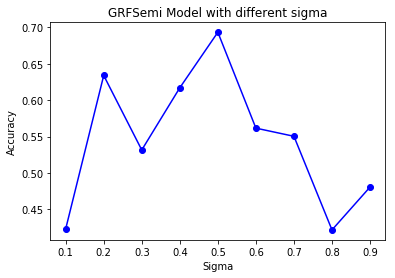

In [227]:
plt.plot(sigma, scores, c='b', marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('GRFSemi Model with different sigma')

In [ ]:
# sigma取不同值, LLGCSemi模型
sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
scores = []
for v in sigma:
    gamma = 1 / (2 * v * v)
    semi_model = LLGCSemi(gamma=gamma)
    semi_model.fit(X_train, y_train)
    y_pred = semi_model.predict(X_test)

    scores.append(accuracy_score(y_pred, y_test))

Text(0.5,1,'LLGCSemi Model with different sigma')

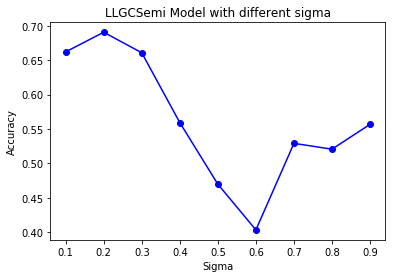

In [228]:
plt.plot(sigma, scores, c='b', marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('LLGCSemi Model with different sigma')

In [ ]:
# lambda取不同值, LLGCSemi模型
lambda_value = [0.1, 0.25, 0.42, 0.67, 1, 1.5, 2.3, 4, 9]
scores = []
for v in lambda_value:
    alpha = lambda_value / (1 + lambda_value)
    semi_model = LLGCSemi(alpha=alpha)
    semi_model.fit(X_train, y_train)
    y_pred = semi_model.predict(X_test)

    scores.append(accuracy_score(y_pred, y_test))

Text(0.5,1,'LLGCSemi Model with different lambda')

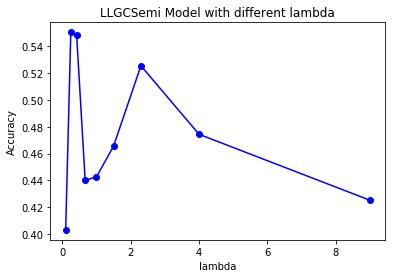

In [229]:
plt.plot(lambda_value, scores, c='b', marker='o')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.title('LLGCSemi Model with different lambda')